<a href="https://colab.research.google.com/github/Danniel1220/Used-Cars-Regression/blob/master/used_cars_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random

#Let's make this notebook reproducible 
np.random.seed(42)
random.seed(42) 

In [ ]:
# Reading data
audi = pd.read_csv('audi.csv')

In [ ]:
# Visualizing data
audi.head()
audi.describe()

,year,price,mileage,tax,mpg,engineSize,miles_per_year
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709,5453.316778
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957,3583.988609
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000,0.500000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000,2877.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000,4933.541667
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000,7370.566667
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000,27972.500000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


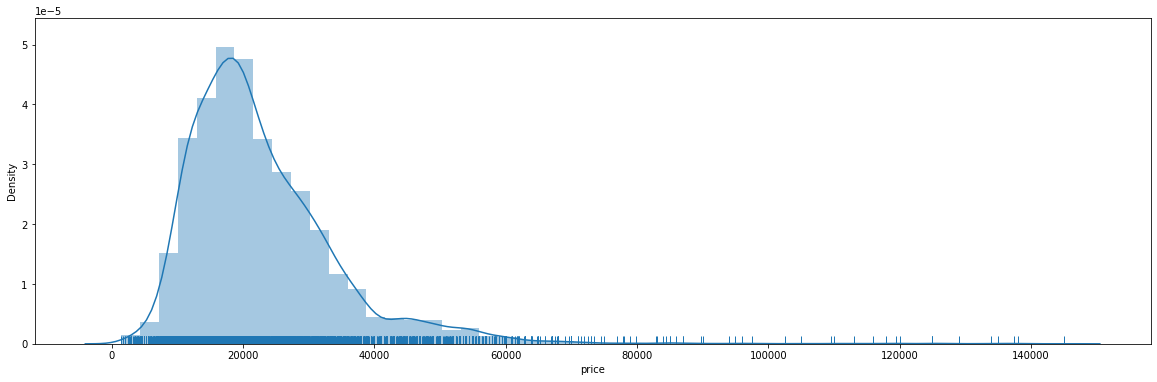

In [ ]:
# Plotting data based on price
plt.figure(figsize=(20,6))
sb.distplot(audi['price'], rug=True)

In [ ]:
# Exploring engineSize distribution
audi['engineSize'].unique()

array([1.4, 2. , 1. , 3. , 1.6, 1.8, 1.5, 4. , 2.5, 1.2, 4.2, 2.9, 5.2,
       1.9, 2.7, 0. , 3.2, 4.1, 6.3])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


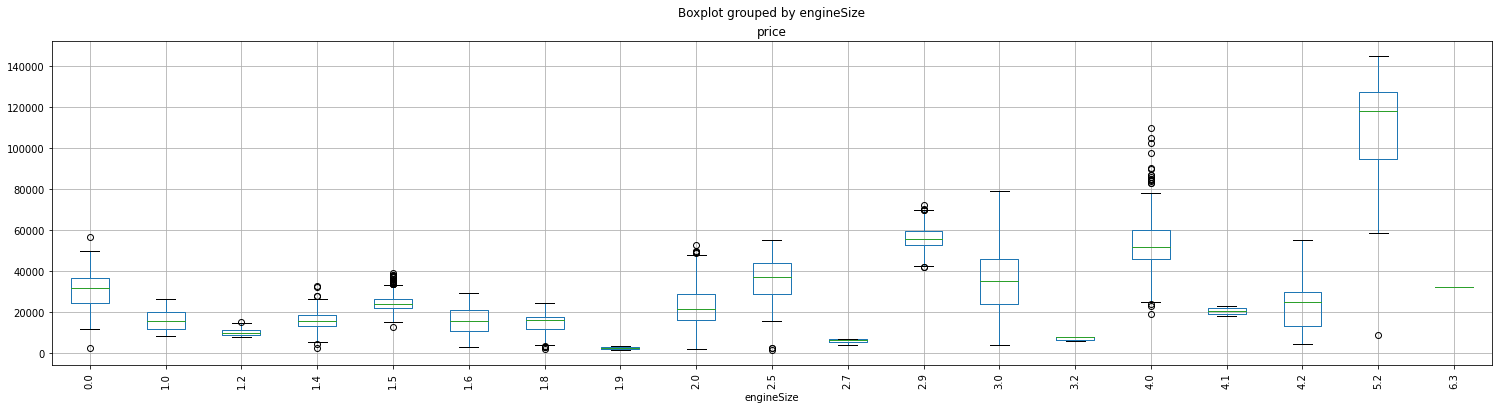

In [ ]:
# Boxplotting prices against engine size
audi.boxplot(column='price', by='engineSize', figsize=(25, 6), rot=90)

In [ ]:
# Computing miles driven per year
# Since the dataset comes from the year 2021, we will compute the data as if the year is 2021

audi['miles_per_year'] = audi['mileage'] / (2021 - audi['year'])
audi.head()
audi.describe()

,year,price,mileage,tax,mpg,engineSize,miles_per_year
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709,5453.316778
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957,3583.988609
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000,0.500000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000,2877.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000,4933.541667
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000,7370.566667
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000,27972.500000


In [ ]:
# Converting data into a form that is compatible with the linear regression 
# (i.e. we cant give model A1 as an input, but we can create a new column that contains a bool value of wether the car is of model A1 or not)

audi = pd.get_dummies(audi)
audi.head()

,year,price,mileage,tax,mpg,engineSize,miles_per_year,model_ A1,model_ A2,model_ A3,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,3933.75,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,16500,36203,20,64.2,2.0,7240.60,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,11000,29946,30,55.4,1.4,5989.20,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,16800,25952,145,67.3,2.0,6488.00,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2019,17300,1998,145,49.6,1.0,999.00,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
# Split the data based on what we want to predict, which in our case is the price

X = audi.copy().drop('price', axis = 1)
y = audi['price'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
baseline = y_train.median()
baseline_error = np.sqrt(mean_squared_error(y_pred=np.ones_like(y_test) * baseline, y_true=y_test))
baseline_error

12198.440633038523

In [ ]:
lr = LinearRegression()
alphas = [1000, 100, 50, 20, 10, 1, 0.1, 0.01]
l1_ratios = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
ridge = RidgeCV(alphas=alphas)
lasso = LassoCV(alphas=alphas, max_iter=10000)
elastic = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios)

In [ ]:
for model, name in zip([lr, ridge, lasso, elastic], ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred = model.predict(X_test_scaled)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    best_alpha = ''
    if name != 'LinearRegression':
        best_alpha = ' best alpha: ' + str(model.alpha_)
    best_l1 = ''
    if name == 'ElasticNet':
        best_l1 = ' best l1: '+ str(model.l1_ratio_)
    print(name + ' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test) + best_alpha + best_l1)

LinearRegression mrse_train: 3766.734370566596, mrse_test: 3975.896034564607
Ridge mrse_train: 3766.773946959685, mrse_test: 3976.3348618774253 best alpha: 10.0
Lasso mrse_train: 3768.0580416799335, mrse_test: 3983.987075841092 best alpha: 10.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1798766054.1057892, tolerance: 89605102.30972734
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2814191538.800522, tolerance: 86806833.79616193
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285584071.56248474, tolerance: 86160866.14845754
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304406310.

ElasticNet mrse_train: 3767.0378734520054, mrse_test: 3977.3186598482785 best alpha: 0.01 best l1: 0.7


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+09, tolerance: 1.092e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# Ranking columns based on apparent importance

order = np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
    coef_ = lasso.coef_[i]
    if coef_ > 0:
        print(X.columns[i] + ', ' + str(lasso.coef_[i]))

year, 4885.034273367478
engineSize, 2981.071090253812
model_ R8, 2862.9133638057588
model_ Q7, 2293.6675693239717
model_ Q8, 1700.9058306326428
fuelType_Hybrid, 1557.397434693603
model_ RS6, 1178.2949121488302
model_ Q5, 1071.998187833881
model_ RS4, 994.941541858386
model_ RS5, 776.3722442469876
model_ A8, 493.4227862286978
model_ SQ7, 391.2946382783698
model_ RS3, 352.63749157478446
model_ A2, 167.64351157001028
model_ RS7, 153.11518443872492
model_ A7, 112.02831907878091
model_ S8, 110.47783144572266
model_ SQ5, 109.7698899077477
model_ S4, 86.32466933026141
model_ S3, 83.31050420236355
model_ TT, 57.15052987706766
model_ A6, 55.750551949039824
transmission_Semi-Auto, 53.933715123983696


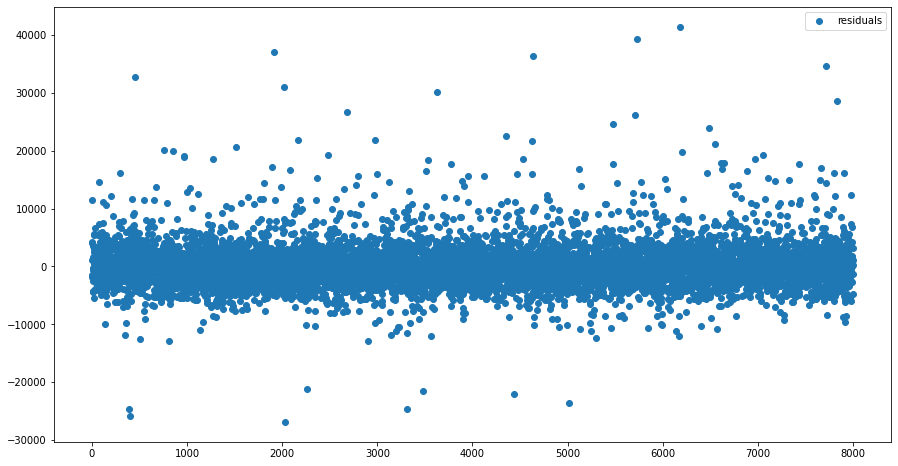

In [ ]:
# Error analysis
# (the closer the dots are to the y = 0 axis the better)
# (the predictions, for the most part, are accurate, but at times the predicted price is very far off, driving the error rate up)

y_pred_train = lasso.predict(X_train_scaled)
diff = y_train - y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)), diff, label = 'residuals')
plt.legend()

In [ ]:
X_train[np.abs(diff) > 100].describe()

,year,mileage,tax,mpg,engineSize,miles_per_year,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
count,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,...,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000
mean,2017.075795,25058.656544,126.356325,50.750611,1.938180,5461.639087,0.126496,0.000129,0.177069,0.130871,...,0.000386,0.001287,0.000643,0.032557,0.249646,0.407927,0.342427,0.523871,0.002831,0.473298
std,2.207346,23856.119289,67.706170,13.105933,0.603523,3593.142587,0.332429,0.011344,0.381751,0.337281,...,0.019646,0.035852,0.025359,0.177485,0.432836,0.491481,0.474552,0.499462,0.053136,0.499319
min,1997.000000,5.000000,0.000000,18.900000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,5900.500000,125.000000,40.900000,1.500000,2855.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,19215.000000,145.000000,49.600000,2.000000,4990.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2019.000000,36859.500000,145.000000,58.900000,2.000000,7375.700000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,2020.000000,323000.000000,580.000000,188.300000,5.200000,27972.500000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Splitting data between wrong predictions, more than 500 and less than 200

high_error = X_train[np.abs(diff) > 200]
print('size high error: ' + str(len(high_error)))
low_error = X_train[np.abs(diff) < 200]
print('size low error: ' + str(len(low_error)))

size high error: 7527
size low error: 474


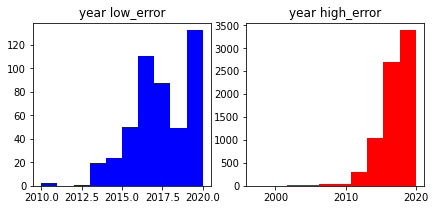

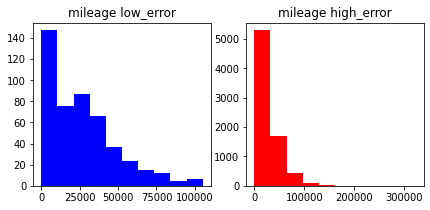

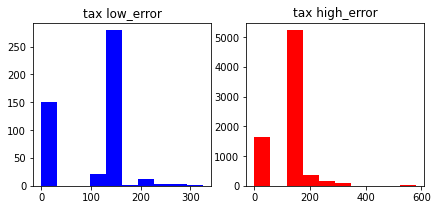

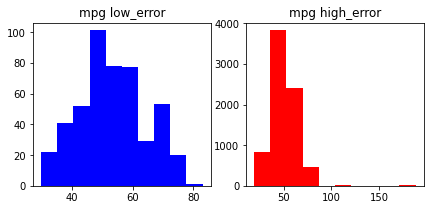

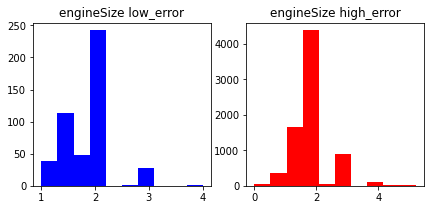

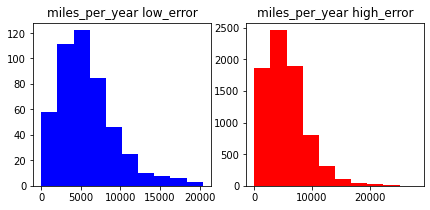

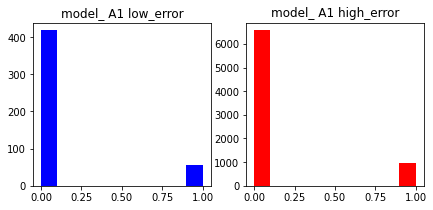

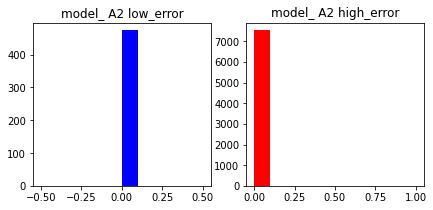

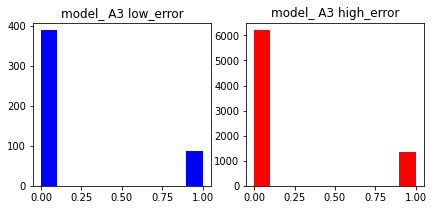

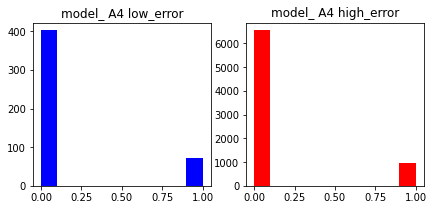

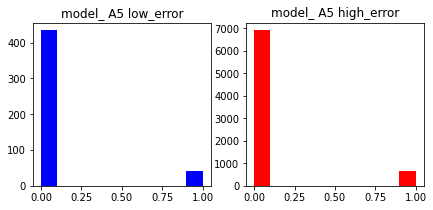

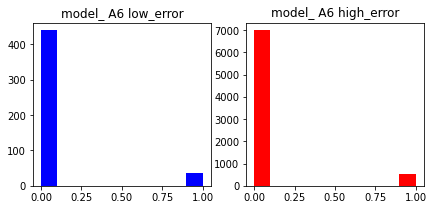

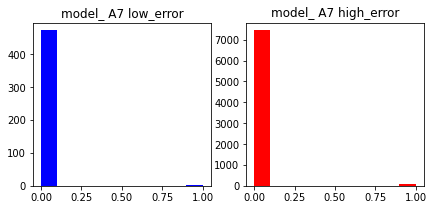

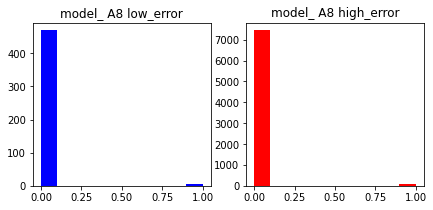

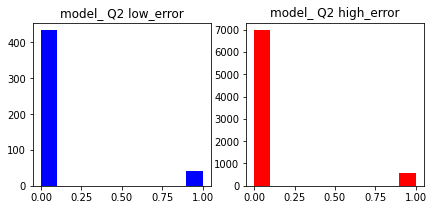

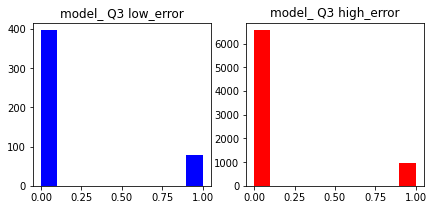

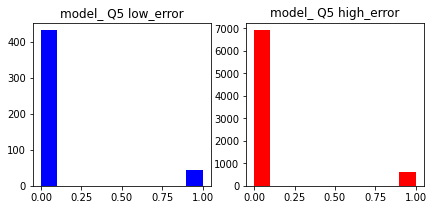

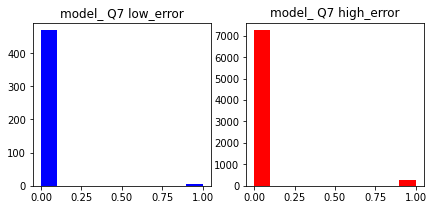

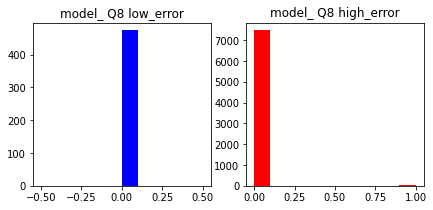

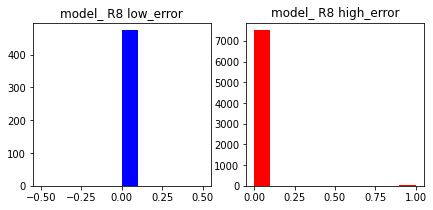

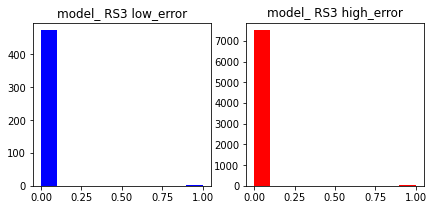

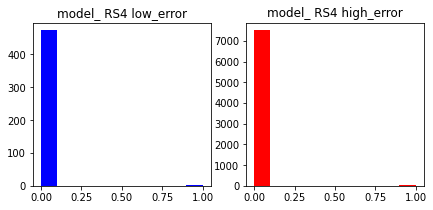

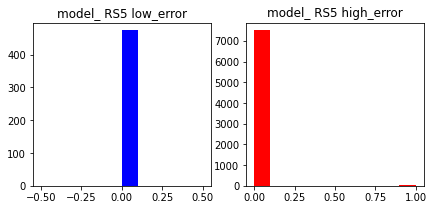

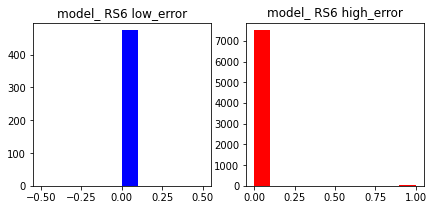

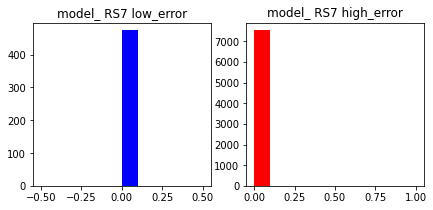

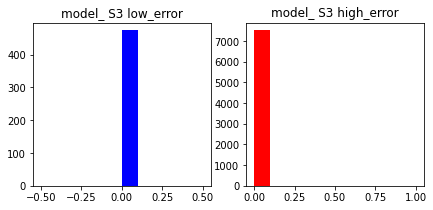

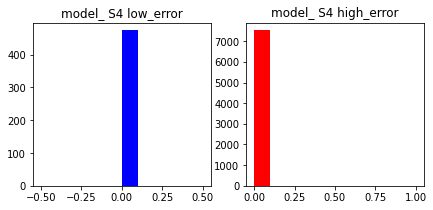

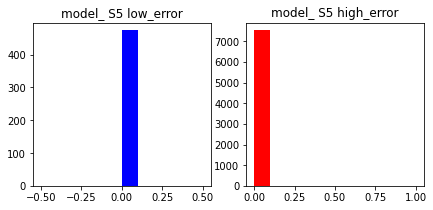

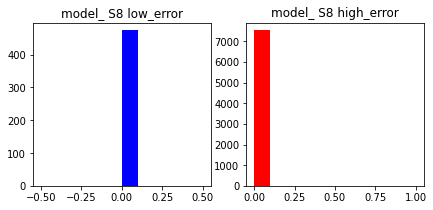

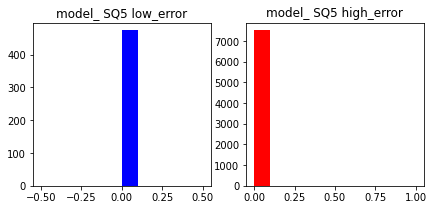

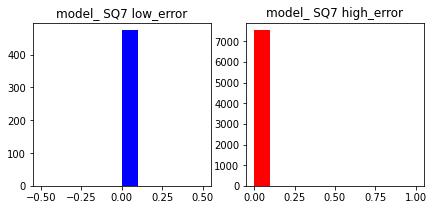

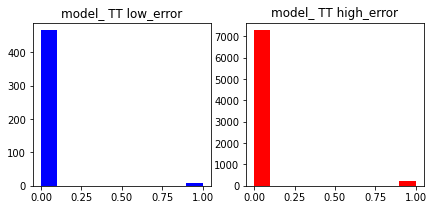

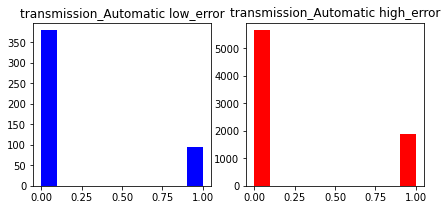

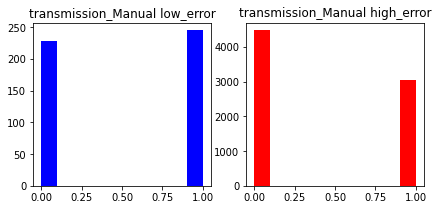

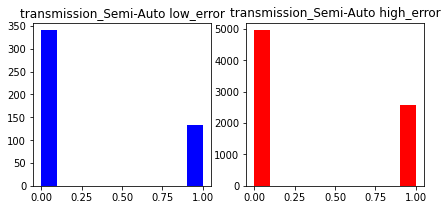

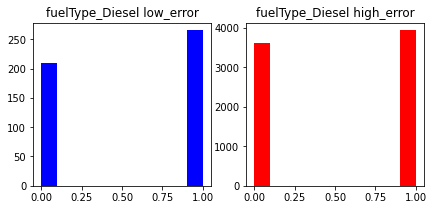

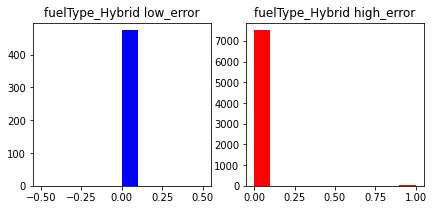

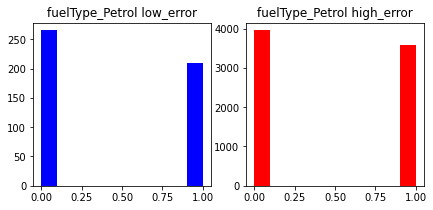

In [ ]:
# Comparing distribution of high and low errors based on each individual column
# What we are looking for here is a big discrepancy between high and low error for a specific column

for c in high_error.columns:
    plt.figure(figsize=(7,3))
    plt.subplot(121)
    plt.hist(low_error[c], color='b')
    plt.title(c + ' low_error')
    plt.subplot(122)
    plt.hist(high_error[c], color='r')
    plt.title(c + ' high_error')
    plt.show()

In [ ]:
#